In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import random as rnd
%matplotlib inline

[-4, 4, 6, 60]

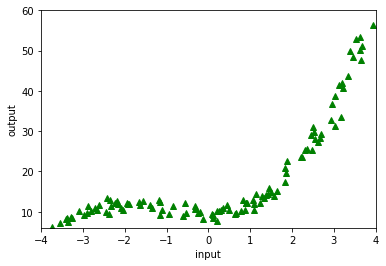

In [102]:
data = sio.loadmat('dataset1.mat')
X = data['X_trn']
Y = data['Y_trn']
Xtest = data['X_tst']
Ytest = data['Y_tst']
plt.plot(X, Y, "g^")
plt.ylabel('output')
plt.xlabel('input')
plt.axis([-4,4,6,60])

In [103]:
def stochasticGradientDescent(X, y, m, theta, alpha, iters, r = 0.0001):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.ravel().shape[1]
    cost = np.zeros(iters)
    
    for i in range(iters):
        rand = rnd.sample(range(0,X.shape[0]-1), m)
        newX = X[rand,:]
        newY = Y[rand,:]
                          
        error = (newX * theta.T) - newY
        
        for j in range(parameters):
            term = np.multiply(error, newX[:,j])
            temp[0,j] = theta[0,j] - ((alpha / (r*(1+i)*len(newX))) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(newX, newY, theta)
        
        if i % 50 == 0:
            print("Loss iter",i,": ",cost[i])
        
    return theta, cost

In [104]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.ravel().shape[1]
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
        if i % 50 == 0:
            print("Loss iter",i,": ",cost[i])
        
    return theta, cost

In [105]:
def computeCost(X, Y, theta):
    inner = np.power(((X * theta.T) - Y), 2)
    return np.sum(inner) / (2 * len(X))

In [106]:
def closedForm(X, Y):
    xTransposeX = np.matmul(X.T, X)
    xTransposeY = np.matmul(X.T, Y)
    inv = np.linalg.pinv(xTransposeX)
    return np.matmul(inv, xTransposeY)

In [107]:
def plotPrediction(xMin, xMax, xLabel, yLabel, f):
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(x, f, 'r', label='Prediction')
    ax.scatter(data['X_trn'], data['Y_trn'], label='Traning Data')
    ax.legend(loc=2)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title('Predicted X vs. Y Size')

# Stochastic gradient decent

In [108]:
X = np.matrix(X)
Y = np.matrix(Y)
theta = np.matrix(np.array([0,0]))

# Dimensions of the X, Y and theta matrices.

In [109]:
ones = np.ones(X.shape, dtype=np.int)
newX = np.append(ones, X, axis=1)


In [110]:
newX.shape, theta.shape, Y.shape, X.shape

((120, 2), (1, 2), (120, 1), (120, 1))

Loss iter 0 :  163060.877914
Loss iter 50 :  7.70568391251e+17
Loss iter 100 :  8.42444378962e+12
Loss iter 150 :  11311156474.6
Loss iter 200 :  107498276.729
Loss iter 250 :  3234452.35177
Loss iter 300 :  151101.803793
Loss iter 350 :  14605.3942889
Loss iter 400 :  1545.45199828
Loss iter 450 :  315.115994357
Loss iter 500 :  74.2040727032
Loss iter 550 :  33.3000368692
Loss iter 600 :  57.7793466056
Loss iter 650 :  75.7869011976
Loss iter 700 :  16.267759622
Loss iter 750 :  21.243165108
Loss iter 800 :  29.3813583331
Loss iter 850 :  17.1503398681
Loss iter 900 :  20.3425694684
Loss iter 950 :  26.1082031929


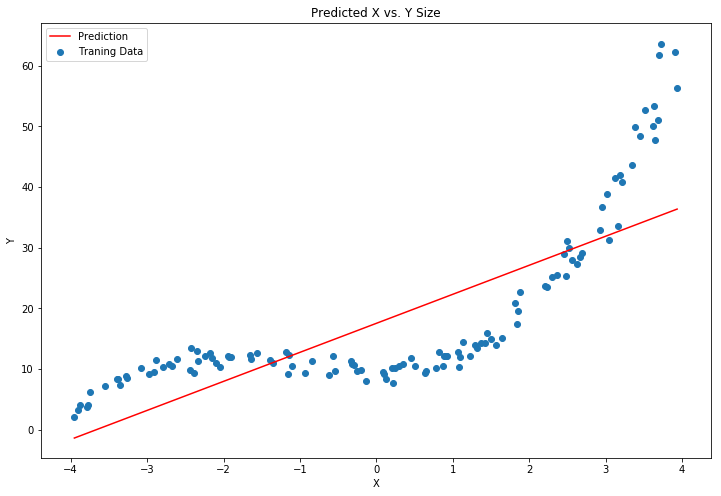

In [111]:
theta = np.matrix(np.array([0,0]))
g, cost = stochasticGradientDescent(newX, Y, int(0.1* Y.shape[0]), theta, alpha=0.0008, iters=1000)

x = np.linspace(X.min(), X.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
plotPrediction(X.min(), X.max(), 'X', 'Y', f)

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [112]:
computeCost(newX, Y, g)

39.407775892302304

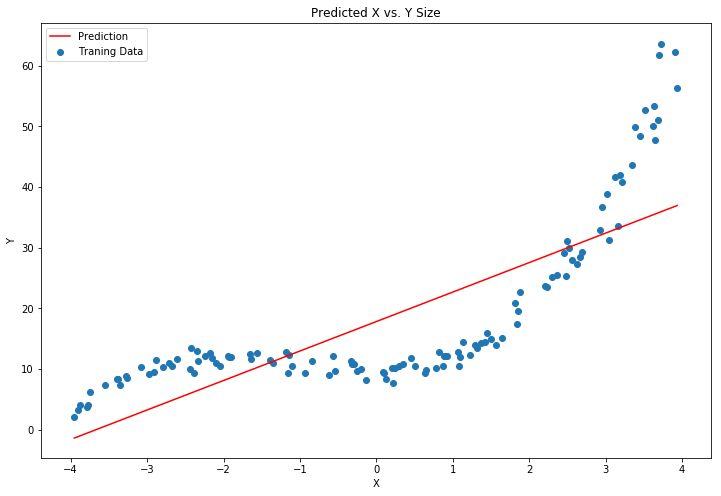

In [113]:
sol = closedForm(newX, Y).T
computeCost(newX, Y, sol)
f = sol[0, 0] + (sol[0, 1] * x)
plotPrediction(X.min(), X.max(), 'X', 'Y', f)

# When n=2, 3 and 5

In [114]:
X2 = np.power(X, 2)
X3 = np.power(X, 3)
X4 = np.power(X, 4)
X5 = np.power(X, 5)

# When n = 2

In [115]:
newX = np.append(ones, X, axis=1)
Xsqr = np.concatenate((ones, X2, X), axis=1)
theta = np.matrix(np.array([0,0,0]))
g, cost = stochasticGradientDescent(Xsqr, y, int(0.1* y.shape[0]), theta, alpha=0.00064, iters=1000)
g
fSqr = gSqr[0, 0] + (gSqr[0, 1] * x**2) + (gSqr[0, 2] * x)
plotPrediction(Xtest.min(), Xtest.max(), 'X-Square', 'Y-Square', fSqr)

NameError: name 'y' is not defined

In [ ]:
sol = closedForm(Xsqr, Y).T
computeCost(Xsqr, Y, sol)
fSqr = sol[0, 0] + (sol[0, 1] * x**2) + (sol[0, 2] * x)
plotPrediction(X.min(), X.max(), 'X', 'Y', fSqr)


In [ ]:
computeCost(Xsqr, y, gsqr)

In [ ]:
computeCost(Xsqr, y, sol)

# When n=3

In [ ]:
Xcube = np.concatenate((ones, X, X2, X3), axis=1)
theta = np.matrix(np.array([0,0,0,0]))
gCube, cost = stochasticGradientDescent(Xcube, y, int(0.1* y.shape[0]), theta, alpha=0.00000128, iters=10000)
gCube
fCube = gCube[0, 0] + (gCube[0, 3] * x) + (gCube[0, 2] * x**2) + (gCube[0, 1] * x**3)
plotPrediction(-4, 4, 'X-Cube', 'Y-Cube', fCube)


In [ ]:
sol = closedForm(Xcube, Y).T
computeCost(Xcube, Y, sol)
fCube = sol[0, 0] + (sol[0, 3] * x) + (sol[0, 2] * x**2) + (sol[0, 1] * x**3)
plotPrediction(Xtest.min(), Xtest.max(), 'X-Cube', 'Y-Cube', fCube)

In [ ]:
computeCost(Xcube, Y, sol)

In [ ]:
computeCost(Xcube, Y, gCube)

# For n=5,

In [ ]:
Xfive = np.concatenate((ones, X5, X4, X3, X2, X), axis=1)
theta = np.matrix(np.array([0,0,0,0,0,0]))
gFive, cost = stochasticGradientDescent(Xfive, y, int(0.1* y.shape[0]), theta, alpha=0.000000000128, iters=10000)
fFive = gFive[0, 0] + (gFive[0, 1] * x) + (gFive[0, 4] * x**2) + (gFive[0, 3] * x**3) +(gFive[0, 2] * x**4) + (gFive[0, 1] * x**5)
plotPrediction(Xtest.min(), Xtest.max(), 'X-Five', 'Y-Five', fFive)


In [ ]:
sol = closedForm(Xfive, Y).T
sol
fFive = sol[0, 0] + (sol[0, 1] * x) + (sol[0, 4] * x**2) + (sol[0, 3] * x**3) +(sol[0, 2] * x**4) + (sol[0, 1] * x**5)
plotPrediction(Xtest.min(), Xtest.max(), 'X-Five', 'Y-Five', fFive)

In [ ]:
computeCost(Xfive, Y, gFive)

In [ ]:
computeCost(Xfive, Y, sol)